autor: Bruno Gonçalves Pereira
University of Sao Paulo, Oceanographic Institute

In [38]:
%matplotlib inline

# import libraries to read and plot statistical analyses of marine satellite data

import xarray as xr # netcdf4 library
import warnings
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec, ticker
from dask.diagnostics import ProgressBar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean as cmo
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid
#from scipy.ndimage.filters import gaussian_filter
#import seawater as sw
import numpy as np
import pandas as pd

#### Load Sea Surface Temperature (SST) OSTIA rep-data ##### 

Os dados reprocessados do programa copernicus podem ser usados como exemplos para observaçao de séries climátológicas, a alta
resoluçao espacial.

https://resources.marine.copernicus.eu/product-detail/SST_GLO_SST_L4_REP_OBSERVATIONS_010_011/INFORMATION

In [2]:
# #1997 to 2019

#comando                    adress                                    nome                                                    nome do produto                              - subset                                                                              #seleçao temporal           min         max                       - variavel                                                         local onde vai ser salvo no seu computador ee nome do arquivo               

# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "1997-01-01 12:00:00" --date-max "1997-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_1997_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "1998-01-01 12:00:00" --date-max "1998-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_1998_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "1999-01-01 12:00:00" --date-max "1999-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_1999_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2000-01-01 12:00:00" --date-max "2000-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2000_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2001-01-01 12:00:00" --date-max "2001-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2001_DAILY --user login --pwd
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2002-01-01 12:00:00" --date-max "2002-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2002_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2003-01-01 12:00:00" --date-max "2003-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2003_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2004-01-01 12:00:00" --date-max "2004-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2004_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2005-01-01 12:00:00" --date-max "2005-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2005_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2006-01-01 12:00:00" --date-max "2006-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2006_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2007-01-01 12:00:00" --date-max "2007-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2007_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2008-01-01 12:00:00" --date-max "2008-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2008_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2009-01-01 12:00:00" --date-max "2009-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2009_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2010-01-01 12:00:00" --date-max "2010-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2010_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2011-01-01 12:00:00" --date-max "2011-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2011_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2012-01-01 12:00:00" --date-max "2012-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2012_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2013-01-01 12:00:00" --date-max "2013-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2013_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2014-01-01 12:00:00" --date-max "2014-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2014_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2015-01-01 12:00:00" --date-max "2015-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2015_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2016-01-01 12:00:00" --date-max "2016-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2016_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2017-01-01 12:00:00" --date-max "2017-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2017_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2018-01-01 12:00:00" --date-max "2018-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2018_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2019-01-01 12:00:00" --date-max "2019-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2019_DAILY --user login --pwd 
# !python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "2020-01-01 12:00:00" --date-max "2020-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/git/CMEMS/ostia_data --out-name SST_2020_DAILY --user login --pwd senha/password

In [3]:
#!python3 -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS --product-id METOFFICE-GLO-SST-L4-REP-OBS-SST --longitude-min -60.0 --longitude-max -40.0 --latitude-min -40.0 --latitude-max -20.0 --date-min "1994-01-01 12:00:00" --date-max "1994-12-31 12:00:00" --variable analysed_sst --variable analysis_error --variable mask --out-dir /home/br/git/CMEMS/ostia_data --out-name SST_1994_DAILY --user bpereira --pwd Ilh@bela2020

In [4]:
source = xr.open_mfdataset('/home/bruno/git/CMEMS/ostia_data/SST*',concat_dim='time') #open multifile data in your computer
source = source.assign({'analysed_sst':source.analysed_sst-273}) # kelvin to celsius step
source.close()

In [5]:
# explore as variaveis e atributos dos dados de SST voce pode ter acesso a informaçoes importantes
# e caracteristicas

#print(source)
#print(source.var)
#print(source.attrs)

Gridded Bathymetry Data, GEBCO - IOC/UNESCO dataset 

https://www.gebco.net/data_and_products/gridded_bathymetry_data/#global


In [6]:
#  load/carregue os dados batimetria

dado = xr.open_dataset('/home/bruno/git/CMEMS/gebco/gebco_2020_n-20.0_s-40.0_w-60.0_e-40.0.nc')

bat = dado.interp({'lon':source.lon, 'lat':source.lat}).elevation

dado.close()

#### make a mask  - spatial selection

Seleçao de área: Aqui definimos nossa porção final de análise, uma área que corresponde a região costeira no litoral sudeste com definida por uma batimetria menor que 200.

Chuí to SBS (21/23 S- 33.41 E)



In [7]:
#mask_sst = source.analysed_sst.sel(lon=slice(-55.0, -40.0), lat=slice(-33.4, -23.0)).where((bat>-200)&(bat<-10 ))
mask_sst_1 = source.analysed_sst.sel(lon=slice(-55.0, -40.0), lat=slice(-33.4, -21.0)).where((bat>-200)&(bat<-10 ))
#mask_1 - cabo sao tome

#### mapas usando a biblioteca/librarie matplotlib

In [ ]:
land = cfeature.NaturalEarthFeature(
    'physical','land','10m',edgecolor='face',facecolor='0.5'
)

proj = ccrs.Mercator()

kw = dict(transform=ccrs.PlateCarree())


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1,1,1,projection=proj)
mask_sst_1.mean('time').plot.contourf(ax=ax,vmin=19,vmax=25,cmap= cmo.cm.thermal,levels=10,**kw)

#ax.plot([-48.25,-46.20],[-26,-26],color='red',**kw,zorder=1e3)
ax.coastlines()
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True,linestyle='--')
gl.top_labels = False
gl.right_labels = False
ax.set_extent([
    -55, -40,
    -33.4, -23
],crs=ccrs.PlateCarree())

#### Agrupamentos a partir do programa groubby

possibilidade de agrupamentos dos dados:

ex: dataset. groupby("time.month").mean() para dados mensais

 time season group - Aqui temos a média para as 4 estações, ou seja, temos a estação média para a série temporal

In [8]:
# groupby

#mean_sst = mask_sst.sel(time=slice('1982','2019')).groupby('time.year').mean('time')

mean_sst_1 = mask_sst_1.sel(time=slice('1982','2018')).groupby('time.year').mean('time')


#mask_sst.close()
mask_sst_1.close()

In [9]:

# with ProgressBar():
#         ymean_sst = mean_sst.mean(['lon','lat']).compute()
        
# mean_sst.close()

In [10]:
with ProgressBar():
        ymean_sst_1 = mean_sst_1.mean(['lon','lat']).compute()
        
mean_sst_1.close()

[########################################] | 100% Completed | 38.4s


seleçao dos dados para cada ano

In [ ]:
# sst_1982 = mask_sst.sel(time=slice('1982')).groupby('time.month').mean('time')
# sst_1983 = mask_sst.sel(time=slice('1983')).groupby('time.month').mean('time')
# sst_1984 = mask_sst.sel(time=slice('1984')).groupby('time.month').mean('time')
# sst_1985 = mask_sst.sel(time=slice('1985')).groupby('time.month').mean('time')
# sst_1986 = mask_sst.sel(time=slice('1986')).groupby('time.month').mean('time')
# sst_1987 = mask_sst.sel(time=slice('1987')).groupby('time.month').mean('time')
# sst_1988 = mask_sst.sel(time=slice('1988')).groupby('time.month').mean('time')
# sst_1989 = mask_sst.sel(time=slice('1989')).groupby('time.month').mean('time')
# sst_1990 = mask_sst.sel(time=slice('1990')).groupby('time.month').mean('time')
# sst_1991 = mask_sst.sel(time=slice('1991')).groupby('time.month').mean('time')
# sst_1992 = mask_sst.sel(time=slice('1992')).groupby('time.month').mean('time')
# sst_1993 = mask_sst.sel(time=slice('1993')).groupby('time.month').mean('time')
# sst_1994 = mask_sst.sel(time=slice('1994')).groupby('time.month').mean('time')
# sst_1995 = mask_sst.sel(time=slice('1995')).groupby('time.month').mean('time')
# sst_1996 = mask_sst.sel(time=slice('1996')).groupby('time.month').mean('time')
# sst_1997 = mask_sst.sel(time=slice('1997')).groupby('time.month').mean('time')
# sst_1998 = mask_sst.sel(time=slice('1998')).groupby('time.month').mean('time')
# sst_1999 = mask_sst.sel(time=slice('1999')).groupby('time.month').mean('time')
# sst_2000 = mask_sst.sel(time=slice('2000')).groupby('time.month').mean('time')
# sst_2001 = mask_sst.sel(time=slice('2001')).groupby('time.month').mean('time')
# sst_2002 = mask_sst.sel(time=slice('2002')).groupby('time.month').mean('time')
# sst_2003 = mask_sst.sel(time=slice('2003')).groupby('time.month').mean('time')
# sst_2004 = mask_sst.sel(time=slice('2004')).groupby('time.month').mean('time')
# sst_2005 = mask_sst.sel(time=slice('2005')).groupby('time.month').mean('time')
# sst_2006 = mask_sst.sel(time=slice('2006')).groupby('time.month').mean('time')
# sst_2007 = mask_sst.sel(time=slice('2007')).groupby('time.month').mean('time')
# sst_2008 = mask_sst.sel(time=slice('2008')).groupby('time.month').mean('time')
# sst_2009 = mask_sst.sel(time=slice('2009')).groupby('time.month').mean('time')
# sst_2010 = mask_sst.sel(time=slice('2010')).groupby('time.month').mean('time')
# sst_2011 = mask_sst.sel(time=slice('2011')).groupby('time.month').mean('time')
# sst_2012 = mask_sst.sel(time=slice('2012')).groupby('time.month').mean('time')
# sst_2013 = mask_sst.sel(time=slice('2013')).groupby('time.month').mean('time')
# sst_2014 = mask_sst.sel(time=slice('2014')).groupby('time.month').mean('time')
# sst_2015 = mask_sst.sel(time=slice('2015')).groupby('time.month').mean('time')
# sst_2016 = mask_sst.sel(time=slice('2016')).groupby('time.month').mean('time')
# sst_2017 = mask_sst.sel(time=slice('2017')).groupby('time.month').mean('time')
# sst_2018 = mask_sst.sel(time=slice('2018')).groupby('time.month').mean('time')
# sst_2019 = mask_sst.sel(time=slice('2019')).groupby('time.month').mean('time')

# # with ProgressBar():
# #     mean_m_sst = mon_sst.mean(['lon','lat']).compute()

In [ ]:
whos

In [ ]:
#mean_sst_1

In [ ]:
#ano médio

#mask_sst_1.sel(time=slice('1982','2019')).groupby('time.month').mean('time')

In [ ]:
#mask_sst_1.sel(time=('1985')).groupby('time.month').mean('time')

In [11]:
#sst_1982 = mask_sst_1.sel(time=('1982')).groupby('time.month').mean('time')
sst_1983 = mask_sst_1.sel(time=('1983')).groupby('time.month').mean('time')
sst_1984 = mask_sst_1.sel(time=('1984')).groupby('time.month').mean('time')
sst_1985 = mask_sst_1.sel(time=('1985')).groupby('time.month').mean('time')
sst_1986 = mask_sst_1.sel(time=('1986')).groupby('time.month').mean('time')
sst_1987 = mask_sst_1.sel(time=('1987')).groupby('time.month').mean('time')
sst_1988 = mask_sst_1.sel(time=('1988')).groupby('time.month').mean('time')
sst_1989 = mask_sst_1.sel(time=('1989')).groupby('time.month').mean('time')
sst_1990 = mask_sst_1.sel(time=('1990')).groupby('time.month').mean('time')
sst_1991 = mask_sst_1.sel(time=('1991')).groupby('time.month').mean('time')
sst_1992 = mask_sst_1.sel(time=('1992')).groupby('time.month').mean('time')
sst_1993 = mask_sst_1.sel(time=('1993')).groupby('time.month').mean('time')
sst_1994 = mask_sst_1.sel(time=('1994')).groupby('time.month').mean('time')
sst_1995 = mask_sst_1.sel(time=('1995')).groupby('time.month').mean('time')
sst_1996 = mask_sst_1.sel(time=('1996')).groupby('time.month').mean('time')
sst_1997 = mask_sst_1.sel(time=('1997')).groupby('time.month').mean('time')
sst_1998 = mask_sst_1.sel(time=('1998')).groupby('time.month').mean('time')
sst_1999 = mask_sst_1.sel(time=('1999')).groupby('time.month').mean('time')
sst_2000 = mask_sst_1.sel(time=('2000')).groupby('time.month').mean('time')
sst_2001 = mask_sst_1.sel(time=('2001')).groupby('time.month').mean('time')
sst_2002 = mask_sst_1.sel(time=('2002')).groupby('time.month').mean('time')
sst_2003 = mask_sst_1.sel(time=('2003')).groupby('time.month').mean('time')
sst_2004 = mask_sst_1.sel(time=('2004')).groupby('time.month').mean('time')
sst_2005 = mask_sst_1.sel(time=('2005')).groupby('time.month').mean('time')
sst_2006 = mask_sst_1.sel(time=('2006')).groupby('time.month').mean('time')
sst_2007 = mask_sst_1.sel(time=('2007')).groupby('time.month').mean('time')
sst_2008 = mask_sst_1.sel(time=('2008')).groupby('time.month').mean('time')
sst_2009 = mask_sst_1.sel(time=('2009')).groupby('time.month').mean('time')
sst_2010 = mask_sst_1.sel(time=('2010')).groupby('time.month').mean('time')
sst_2011 = mask_sst_1.sel(time=('2011')).groupby('time.month').mean('time')
sst_2012 = mask_sst_1.sel(time=('2012')).groupby('time.month').mean('time')
sst_2013 = mask_sst_1.sel(time=('2013')).groupby('time.month').mean('time')
sst_2014 = mask_sst_1.sel(time=('2014')).groupby('time.month').mean('time')
sst_2015 = mask_sst_1.sel(time=('2015')).groupby('time.month').mean('time')
sst_2016 = mask_sst_1.sel(time=('2016')).groupby('time.month').mean('time')
sst_2017 = mask_sst_1.sel(time=('2017')).groupby('time.month').mean('time')
sst_2018 = mask_sst_1.sel(time=('2018')).groupby('time.month').mean('time')
#sst_2019 = mask_sst_1.sel(time=slice('2019')).groupby('time.month').mean('time')

# with ProgressBar():
#     mean_m_sst = mon_sst.mean(['lon','lat']).compute()

plot

In [12]:
# plt.figure(figsize=(6,2))
# ymean_sst.plot(x ="year" , color='red',linestyle='--')
# plt.xlabel('Years')
# plt.ylabel('celsius [ºC]')
# plt.grid()

# plt.title('Média anual (1982 a 2019) de sst área 1 - chuí - CF')

Text(0.5, 1.0, 'Média anual (1982 a 2018) de sst - 21/33.4 S - 55/40 W')

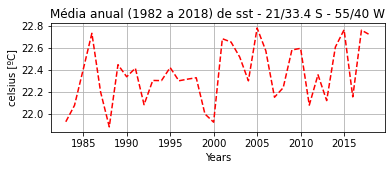

In [13]:
plt.figure(figsize=(6,2))
ymean_sst_1.plot(x ="year" , color='red',linestyle='--')
plt.xlabel('Years')
plt.ylabel('celsius [ºC]')
plt.grid()

plt.title('Média anual (1982 a 2018) de sst - 21/33.4 S - 55/40 W')

transformando em series (data array -dataframe)

In [16]:
#sst_serie = ymean_sst.to_series()
#ls

In [15]:
sst_serie_1 = ymean_sst_1.to_series()

#ls

In [17]:
#sst_serie_1982 = sst_1982.to_series()
sst_serie_1983 = sst_1983.to_series()
sst_serie_1984 = sst_1984.to_series()
sst_serie_1985 = sst_1985.to_series()
sst_serie_1986 = sst_1986.to_series()
sst_serie_1987 = sst_1987.to_series()
sst_serie_1988 = sst_1988.to_series()
sst_serie_1989 = sst_1989.to_series()
sst_serie_1990 = sst_1990.to_series()
sst_serie_1991 = sst_1991.to_series()
sst_serie_1992 = sst_1992.to_series()
sst_serie_1993 = sst_1993.to_series()
sst_serie_1994 = sst_1994.to_series()
sst_serie_1995 = sst_1995.to_series()
sst_serie_1996 = sst_1996.to_series()
sst_serie_1997 = sst_1997.to_series()
sst_serie_1998 = sst_1998.to_series()
sst_serie_1999 = sst_1999.to_series()
sst_serie_2000 = sst_2000.to_series()
sst_serie_2001 = sst_2001.to_series()
sst_serie_2002 = sst_2002.to_series()
sst_serie_2003 = sst_2003.to_series()
sst_serie_2004 = sst_2004.to_series()
sst_serie_2005 = sst_2005.to_series()
sst_serie_2006 = sst_2006.to_series()
sst_serie_2007 = sst_2007.to_series()
sst_serie_2008 = sst_2008.to_series()
sst_serie_2009 = sst_2009.to_series()
sst_serie_2010 = sst_2010.to_series()
sst_serie_2011 = sst_2011.to_series()
sst_serie_2012 = sst_2012.to_series()
sst_serie_2013 = sst_2013.to_series()
sst_serie_2014 = sst_2014.to_series()
sst_serie_2015 = sst_2015.to_series()
sst_serie_2016 = sst_2016.to_series()
sst_serie_2017 = sst_2017.to_series()
sst_serie_2018 = sst_2018.to_series()
#sst_serie_2019 = sst_2019.to_series()

In [18]:
print('area 1 - medias anuais')
print(sst_serie_1)

area 1 - medias anuais
year
1983    21.929218
1984    22.078423
1985    22.404959
1986    22.735401
1987    22.201588
1988    21.882835
1989    22.449450
1990    22.339277
1991    22.417402
1992    22.084839
1993    22.305733
1994    22.304184
1995    22.423290
1996    22.302540
1997    22.317646
1998    22.330458
1999    22.000273
2000    21.925346
2001    22.685957
2002    22.655947
2003    22.519024
2004    22.302319
2005    22.783518
2006    22.576880
2007    22.152983
2008    22.239508
2009    22.583242
2010    22.598516
2011    22.080912
2012    22.357769
2013    22.122206
2014    22.609943
2015    22.767616
2016    22.156197
2017    22.763826
2018    22.719877
Name: analysed_sst, dtype: float32


exportando para csv - chekpoint


In [42]:
#sst_serie.to_csv('area1_ymedias.csv')
sst_serie_1.to_csv('area2_ymedias.csv')

estatistica

medias anuais,
medianas (anuais), 
desvios padrão, 
mínimos e máximos para cada uma das grandes areas.
variancia

In [19]:

#variância: média dos desvios quadráticos area 1
# print('variancia area 1')
# print(np.var(sst_serie))

#variância: média dos desvios quadráticos area 2
print('variancia area 2')
print(np.var(sst_serie_1))

variancia area 2
0.06644199


#### desvio padrao

In [20]:
# #desvio padrão: raiz quadrada da variância
# print('desvio padrao área 1')
# print(np.std(sst_serie))
#desvio padrão: raiz quadrada da variância
print('desvio padrao área 2')
print(np.std(sst_serie_1))

desvio padrao área 2
0.25776345


###  maximos e minimos

In [21]:
#maximo
# print('área 1 - maximo')
# print(np.max(sst_serie))

print('área 2 - maximo')
print(np.max(sst_serie_1))

# #minimo
# print('área 1 - minimo')
# print(np.min(sst_serie))

print('área 2 - minimo')
print(np.min(sst_serie_1))

área 2 - maximo
22.783518
área 2 - minimo
21.882835


### mediana

In [22]:
# print('mediana área 1')
# print(np.median(sst_serie))

In [23]:
print('mediana área 2')
print(np.median(sst_serie_1))

mediana área 2
22.334867


### describe

In [24]:
# print(sst_serie.describe())

In [25]:
print(sst_serie_1.describe())

count    36.000000
mean     22.364143
std       0.261420
min      21.882835
25%      22.155393
50%      22.334867
75%      22.587061
max      22.783518
Name: analysed_sst, dtype: float64


### estatisticas para cada ano

In [26]:
#variância: média dos desvios quadráticos area 1
#print('variancia 2019')
#print(np.var(sst_serie_2019))
print('variancia 2018')
print(np.var(sst_serie_2018))
print('variancia 2017')
print(np.var(sst_serie_2017))
print('variancia 2016')
print(np.var(sst_serie_2016))
print('variancia 2015')
print(np.var(sst_serie_2015))
print('variancia 2014')
print(np.var(sst_serie_2014))
print('variancia 2013')
print(np.var(sst_serie_2013))
print('variancia 2012')
print(np.var(sst_serie_2012))
print('variancia 2011')
print(np.var(sst_serie_2011))
print('variancia 2010')
print(np.var(sst_serie_2010))
print('variancia 2009')
print(np.var(sst_serie_2009))
print('variancia 2008')
print(np.var(sst_serie_2008))
print('variancia 2007')
print(np.var(sst_serie_2007))
print('variancia 2006')
print(np.var(sst_serie_2006))
print('variancia 2005')
print(np.var(sst_serie_2005))
print('variancia 2004')
print(np.var(sst_serie_2004))
print('variancia 2003')
print(np.var(sst_serie_2003))
print('variancia 2002')
print(np.var(sst_serie_2002))
print('variancia 2001')
print(np.var(sst_serie_2001))
print('variancia 2000')
print(np.var(sst_serie_2000))
print('variancia 1999')
print(np.var(sst_serie_1999))
print('variancia 1998')
print(np.var(sst_serie_1998))
print('variancia 1997')
print(np.var(sst_serie_1997))
print('variancia 1996')
print(np.var(sst_serie_1996))
print('variancia 1995')
print(np.var(sst_serie_1995))
print('variancia 1994')
print(np.var(sst_serie_1994))
print('variancia 1993')
print(np.var(sst_serie_1993))
print('variancia 1992')
print(np.var(sst_serie_1992))
print('variancia 1991')
print(np.var(sst_serie_1991))
print('variancia 1990')
print(np.var(sst_serie_1990))
print('variancia 1989')
print(np.var(sst_serie_1989))
print('variancia 1988')
print(np.var(sst_serie_1988))
print('variancia 1987')
print(np.var(sst_serie_1987))
print('variancia 1986')
print(np.var(sst_serie_1986))
print('variancia 1985')
print(np.var(sst_serie_1985))
print('variancia 1984')
print(np.var(sst_serie_1984))
print('variancia 1983')
print(np.var(sst_serie_1983))
#print('variancia 1982')
#print(np.var(sst_serie_1982))

variancia 2018
10.67878
variancia 2017
8.328797
variancia 2016
14.281671
variancia 2015
8.877379
variancia 2014
8.643963
variancia 2013
10.811203
variancia 2012
8.03256
variancia 2011
10.695027
variancia 2010
12.023458
variancia 2009
10.259564
variancia 2008
8.921542
variancia 2007
13.563489
variancia 2006
10.304614
variancia 2005
8.246887
variancia 2004
8.225401
variancia 2003
11.607206
variancia 2002
9.867185
variancia 2001
9.424513
variancia 2000
11.448196
variancia 1999
11.092127
variancia 1998
9.9046335
variancia 1997
8.064291
variancia 1996
12.161761
variancia 1995
11.620177
variancia 1994
10.336875
variancia 1993
12.96183
variancia 1992
8.718938
variancia 1991
8.509033
variancia 1990
10.583453
variancia 1989
9.796458
variancia 1988
12.763816
variancia 1987
11.208525
variancia 1986
8.835393
variancia 1985
7.9719477
variancia 1984
10.555915
variancia 1983
10.962182


In [27]:
#print('std - desvio padrao 2019')
#print(np.std(sst_serie_2019))
print('std - desvio padrao 2018')
print(np.std(sst_serie_2018))
print('std - desvio padrao 2017')
print(np.std(sst_serie_2017))
print('std - desvio padrao 2016')
print(np.std(sst_serie_2016))
print('std - desvio padrao 2015')
print(np.std(sst_serie_2015))
print('std - desvio padrao 2014')
print(np.std(sst_serie_2014))
print('std - desvio padrao 2013')
print(np.std(sst_serie_2013))
print('std - desvio padrao 2012')
print(np.std(sst_serie_2012))
print('std - desvio padrao 2011')
print(np.std(sst_serie_2011))
print('std - desvio padrao 2010')
print(np.std(sst_serie_2010))
print('std - desvio padrao 2009')
print(np.std(sst_serie_2009))
print('std - desvio padrao 2008')
print(np.std(sst_serie_2008))
print('std - desvio padrao 2007')
print(np.std(sst_serie_2007))
print('std - desvio padrao 2006')
print(np.std(sst_serie_2006))
print('std - desvio padrao 2005')
print(np.std(sst_serie_2005))
print('std - desvio padrao 2004')
print(np.std(sst_serie_2004))
print('std - desvio padrao 2003')
print(np.std(sst_serie_2003))
print('std - desvio padrao 2002')
print(np.std(sst_serie_2002))
print('std - desvio padrao 2001')
print(np.std(sst_serie_2001))
print('std - desvio padrao 2000')
print(np.std(sst_serie_2000))
print('std - desvio padrao 1999')
print(np.std(sst_serie_1999))
print('std - desvio padrao 1998')
print(np.std(sst_serie_1998))
print('std - desvio padrao 1997')
print(np.std(sst_serie_1997))
print('std - desvio padrao 1996')
print(np.std(sst_serie_1996))
print('std - desvio padrao 1995')
print(np.std(sst_serie_1995))
print('std - desvio padrao 1994')
print(np.std(sst_serie_1994))
print('std - desvio padrao 1993')
print(np.std(sst_serie_1993))
print('std - desvio padrao 1992')
print(np.std(sst_serie_1992))
print('std - desvio padrao 1991')
print(np.std(sst_serie_1991))
print('std - desvio padrao 1990')
print(np.std(sst_serie_1990))
print('std - desvio padrao 1989')
print(np.std(sst_serie_1989))
print('std - desvio padrao 1988')
print(np.std(sst_serie_1988))
print('std - desvio padrao 1987')
print(np.std(sst_serie_1987))
print('std - desvio padrao 1986')
print(np.std(sst_serie_1986))
print('std - desvio padrao 1985')
print(np.std(sst_serie_1985))
print('std - desvio padrao 1984')
print(np.std(sst_serie_1984))
print('std - desvio padrao 1983')
print(np.std(sst_serie_1983))
#print('std - desvio padrao 1982')
#print(np.std(sst_serie_1982))

std - desvio padrao 2018
3.2678401
std - desvio padrao 2017
2.8859656
std - desvio padrao 2016
3.7791097
std - desvio padrao 2015
2.9794931
std - desvio padrao 2014
2.9400618
std - desvio padrao 2013
3.2880394
std - desvio padrao 2012
2.8341773
std - desvio padrao 2011
3.2703252
std - desvio padrao 2010
3.4674857
std - desvio padrao 2009
3.2030554
std - desvio padrao 2008
2.986895
std - desvio padrao 2007
3.6828642
std - desvio padrao 2006
3.2100801
std - desvio padrao 2005
2.8717394
std - desvio padrao 2004
2.867996
std - desvio padrao 2003
3.406935
std - desvio padrao 2002
3.1412075
std - desvio padrao 2001
3.069937
std - desvio padrao 2000
3.3835185
std - desvio padrao 1999
3.3304844
std - desvio padrao 1998
3.1471627
std - desvio padrao 1997
2.8397696
std - desvio padrao 1996
3.4873717
std - desvio padrao 1995
3.408838
std - desvio padrao 1994
3.215101
std - desvio padrao 1993
3.600254
std - desvio padrao 1992
2.9527848
std - desvio padrao 1991
2.9170246
std - desvio padrao 1990
3.

In [28]:
#print('mediana 2019')
#print(np.median(sst_serie_2019))
print('mediana 2018')
print(np.median(sst_serie_2018))
print('mediana 2017')
print(np.median(sst_serie_2017))
print('mediana 2016')
print(np.median(sst_serie_2016))
print('mediana 2015')
print(np.median(sst_serie_2015))
print('mediana 2014')
print(np.median(sst_serie_2014))
print('mediana 2013')
print(np.median(sst_serie_2013))
print('mediana 2012')
print(np.median(sst_serie_2012))
print('mediana 2011')
print(np.median(sst_serie_2011))
print('mediana 2010')
print(np.median(sst_serie_2010))
print('mediana 2009')
print(np.median(sst_serie_2009))
print('mediana 2008')
print(np.median(sst_serie_2008))
print('mediana 2007')
print(np.median(sst_serie_2007))
print('mediana 2006')
print(np.median(sst_serie_2006))
print('mediana 2005')
print(np.median(sst_serie_2005))
print('mediana 2004')
print(np.median(sst_serie_2004))
print('medianacia 2003')
print(np.median(sst_serie_2003))
print('mediana 2002')
print(np.median(sst_serie_2002))
print('mediana 2001')
print(np.median(sst_serie_2001))
print('mediana 2000')
print(np.median(sst_serie_2000))
print('mediana 1999')
print(np.median(sst_serie_1999))
print('mediana 1998')
print(np.median(sst_serie_1998))
print('mediana 1997')
print(np.median(sst_serie_1997))
print('mediana 1996')
print(np.median(sst_serie_1996))
print('mediana 1995')
print(np.median(sst_serie_1995))
print('mediana 1994')
print(np.median(sst_serie_1994))
print('mediana 1993')
print(np.median(sst_serie_1993))
print('mediana 1992')
print(np.median(sst_serie_1992))
print('mediana 1991')
print(np.median(sst_serie_1991))
print('mediana 1990')
print(np.median(sst_serie_1990))
print('mediana 1989')
print(np.median(sst_serie_1989))
print('mediana 1988')
print(np.median(sst_serie_1988))
print('mediana 1987')
print(np.median(sst_serie_1987))
print('mediana 1986')
print(np.median(sst_serie_1986))
print('mediana 1985')
print(np.median(sst_serie_1985))
print('mediana 1984')
print(np.median(sst_serie_1984))
print('mediana 1983')
print(np.median(sst_serie_1983))
print('mediana 1982')
#print(np.median(sst_serie_1982))

mediana 2018
nan
mediana 2017
nan
mediana 2016
nan
mediana 2015
nan
mediana 2014
nan
mediana 2013
nan
mediana 2012
nan
mediana 2011
nan
mediana 2010
nan
mediana 2009
nan
mediana 2008
nan
mediana 2007
nan
mediana 2006
nan
mediana 2005
nan
mediana 2004
nan
medianacia 2003
nan
mediana 2002
nan
mediana 2001
nan
mediana 2000
nan
mediana 1999
nan
mediana 1998
nan
mediana 1997
nan
mediana 1996
nan
mediana 1995
nan
mediana 1994
nan
mediana 1993
nan
mediana 1992
nan
mediana 1991
nan
mediana 1990
nan
mediana 1989
nan
mediana 1988
nan
mediana 1987
nan
mediana 1986
nan
mediana 1985
nan
mediana 1984
nan
mediana 1983
nan
mediana 1982


In [29]:
##

In [30]:
# #variância: média dos desvios quadráticos area 1
# print('variancia')
# print(np.var(sst_serie))

# #maximo
# print('max')
# print(np.max(sst_serie))

# #minimo
# print('min')
# print(np.min(sst_serie))

# #desvio padrão: raiz quadrada da variância
# print('desvio padrao')
# print(np.std(sst_serie))


# # mediana
# print('mediana área 1')
# print(np.median(sst_serie_1))

In [31]:
# print('max em 2019')
# print(np.max(sst_serie_2019))
print('max em 2018')
print(np.max(sst_serie_2018))
print('max em 2017')
print(np.max(sst_serie_2017))
print('max em 2016')
print(np.max(sst_serie_2016))
print('max em 2015')
print(np.max(sst_serie_2015))
print('max em 2014')
print(np.max(sst_serie_2014))
print('max em 2013')
print(np.max(sst_serie_2013))
print('max em 2012')
print(np.max(sst_serie_2012))
print('max em 2011')
print(np.max(sst_serie_2011))
print('max em 2010')
print(np.max(sst_serie_2010))
print('max em 2009')
print(np.max(sst_serie_2009))
print('max em 2008')
print(np.max(sst_serie_2008))
print('max em 2007')
print(np.max(sst_serie_2007))
print('max em 2006')
print(np.max(sst_serie_2006))
print('max em 2005')
print(np.max(sst_serie_2005))
print('max em 2004')
print(np.max(sst_serie_2004))
print('max em 2003')
print(np.max(sst_serie_2003))
print('max em 2002')
print(np.max(sst_serie_2002))
print('max em 2001')
print(np.max(sst_serie_2001))
print('max em 2000')
print(np.max(sst_serie_2000))
print('max em 1999')
print(np.max(sst_serie_1999))
print('max em 1998')
print(np.max(sst_serie_1998))
print('max em 1997')
print(np.max(sst_serie_1997))
print('max em 1996')
print(np.max(sst_serie_1996))
print('max em 1995')
print(np.max(sst_serie_1995))
print('max em 1994')
print(np.max(sst_serie_1994))
print('max em 1993')
print(np.max(sst_serie_1993))
print('max em 1992')
print(np.max(sst_serie_1992))
print('max em 1991')
print(np.max(sst_serie_1991))
print('max em 1990')
print(np.max(sst_serie_1990))
print('max em 1989')
print(np.max(sst_serie_1989))
print('max em 1988')
print(np.max(sst_serie_1988))
print('max em 1987')
print(np.max(sst_serie_1987))
print('max em 1986')
print(np.max(sst_serie_1986))
print('max em 1985')
print(np.max(sst_serie_1985))
print('max em 1984')
print(np.max(sst_serie_1984))
print('max em 1983')
print(np.max(sst_serie_1983))
#print('max em 1982')
##print(np.max(sst_serie_1982))

max em 2018
28.265474
max em 2017
28.850313
max em 2016
28.48499
max em 2015
28.484188
max em 2014
28.606424
max em 2013
27.178205
max em 2012
27.765862
max em 2011
29.300348
max em 2010
30.007856
max em 2009
28.210705
max em 2008
28.25322
max em 2007
28.751282
max em 2006
28.425344
max em 2005
28.172657
max em 2004
27.563538
max em 2003
29.118565
max em 2002
28.330318
max em 2001
28.499283
max em 2000
27.787737
max em 1999
29.189993
max em 1998
28.899029
max em 1997
27.903221
max em 1996
29.577236
max em 1995
28.513224
max em 1994
28.802847
max em 1993
28.435474
max em 1992
27.966768
max em 1991
27.584513
max em 1990
28.099283
max em 1989
28.358557
max em 1988
28.096125
max em 1987
27.8158
max em 1986
28.359348
max em 1985
28.228699
max em 1984
28.170313
max em 1983
27.748379


In [32]:
# print('min em 2019')
# print(np.min(sst_serie_2019))
print('min em 2018')
print(np.min(sst_serie_2018))
print('min em 2017')
print(np.min(sst_serie_2017))
print('min em 2016')
print(np.min(sst_serie_2016))
print('min em 2015')
print(np.min(sst_serie_2015))
print('min em 2014')
print(np.min(sst_serie_2014))
print('min em 2013')
print(np.min(sst_serie_2013))
print('min em 2012')
print(np.min(sst_serie_2012))
print('min em 2011')
print(np.min(sst_serie_2011))
print('min em 2010')
print(np.min(sst_serie_2010))
print('min em 2009')
print(np.min(sst_serie_2009))
print('min em 2008')
print(np.min(sst_serie_2008))
print('min em 2007')
print(np.min(sst_serie_2007))
print('min em 2006')
print(np.min(sst_serie_2006))
print('min em 2005')
print(np.min(sst_serie_2005))
print('min em 2004')
print(np.min(sst_serie_2004))
print('min em 2003')
print(np.min(sst_serie_2003))
print('min em 2002')
print(np.min(sst_serie_2002))
print('min em 2001')
print(np.min(sst_serie_2001))
print('min em 2000')
print(np.min(sst_serie_2000))
print('min em 1999')
print(np.min(sst_serie_1999))
print('min em 1998')
print(np.min(sst_serie_1998))
print('min em 1997')
print(np.min(sst_serie_1997))
print('min em 1996')
print(np.min(sst_serie_1996))
print('min em 1995')
print(np.min(sst_serie_1995))
print('min em 1994')
print(np.min(sst_serie_1994))
print('min em 1993')
print(np.min(sst_serie_1993))
print('min em 1992')
print(np.min(sst_serie_1992))
print('min em 1991')
print(np.min(sst_serie_1991))
print('min em 1990')
print(np.min(sst_serie_1990))
print('min em 1989')
print(np.min(sst_serie_1989))
print('min em 1988')
print(np.min(sst_serie_1988))
print('min em 1987')
print(np.min(sst_serie_1987))
print('min em 1986')
print(np.min(sst_serie_1986))
print('min em 1985')
print(np.min(sst_serie_1985))
print('min em 1984')
print(np.min(sst_serie_1984))
print('min em 1983')
print(np.min(sst_serie_1983))
#print('min em 1982')
#print(np.min(sst_serie_1982))

min em 2018
12.0958
min em 2017
12.413543
min em 2016
11.853659
min em 2015
12.409672
min em 2014
12.409996
min em 2013
11.423539
min em 2012
12.240316
min em 2011
12.014508
min em 2010
12.289668
min em 2009
12.084508
min em 2008
12.39677
min em 2007
10.034184
min em 2006
12.408704
min em 2005
12.405478
min em 2004
12.39773
min em 2003
12.293219
min em 2002
12.106768
min em 2001
12.403541
min em 2000
11.184835
min em 1999
12.31225
min em 1998
12.396121
min em 1997
12.250959
min em 1996
10.884829
min em 1995
11.383218
min em 1994
12.347412
min em 1993
11.4859915
min em 1992
12.108056
min em 1991
12.045154
min em 1990
12.393541
min em 1989
12.400635
min em 1988
11.669994
min em 1987
12.238702
min em 1986
12.406122
min em 1985
12.399345
min em 1984
11.119024
min em 1983
11.906767


In [33]:
whos

Variable         Type         Data/Info
---------------------------------------
AxesGrid         type         <class 'mpl_toolkits.axes<...>id1.axes_grid.ImageGrid'>
GeoAxes          type         <class 'cartopy.mpl.geoaxes.GeoAxes'>
ProgressBar      type         <class 'dask.diagnostics.progress.ProgressBar'>
bat              DataArray    <xarray.DataArray 'elevat<...>n_uom_name:        Metres
ccrs             module       <module 'cartopy.crs' fro<...>packages/cartopy/crs.py'>
cfeature         module       <module 'cartopy.feature'<...>opy/feature/__init__.py'>
cmo              module       <module 'cmocean' from '/<...>ges/cmocean/__init__.py'>
colors           module       <module 'matplotlib.color<...>es/matplotlib/colors.py'>
dado             Dataset      <xarray.Dataset>\nDimensi<...>..\n    node_offset:  1.0
gridspec         module       <module 'matplotlib.grids<...>/matplotlib/gridspec.py'>
mask_sst_1       DataArray    <xarray.DataArray 'analys<...>0 ... 2019-12-31T12:00:00


In [39]:
series = pd.Series(["sst_serie_1983","sst_serie_1984","sst_serie_1985","sst_serie_1986","sst_serie_1987",
                    "sst_serie_1988","sst_serie_1989","sst_serie_1990","sst_serie_1991","sst_serie_1992",
                    "sst_serie_1993","sst_serie_1994","sst_serie_1995","sst_serie_1996","sst_serie_1997",
                    "sst_serie_1998","sst_serie_1999","sst_serie_2000","sst_serie_2000","sst_serie_2000",
                    "sst_serie_2001","sst_serie_2002","sst_serie_2003","sst_serie_2004","sst_serie_2005",
                    "sst_serie_2006","sst_serie_2007","sst_serie_2008","sst_serie_2009", "sst_serie_2010",
                    "sst_serie_2011","sst_serie_2012","sst_serie_2013","sst_serie_2014","sst_serie_2015",
                    "sst_serie_2016","sst_serie_2017","sst_serie_2018"])
        

In [41]:
series[0]

'sst_serie_1983'